## ML => Total Percent of ICV 단위로 변경

1. [Train ICV](#Train-ICV)
2. [Train Grade](#Train-Grade)
3. [Train volume to icv](#Train-volume-to-icv)
4. [Test ICV](#Test-ICV)
5. [Test Grade](#Test-Grade)
6. [Test volume to icv](#Test-volume-to-icv)
7. [Save as csv](#Save-as-csv)

In [1]:
# neuroquant (T1-weighted)
pathn_train = 'labels/data_804_grade.csv'  # training data
pathn_721 = 'labels/admin_NeuroQuant.csv'  # 721
pathn_93 = '/home/jhj/Desktop/data/2022_snu/admin_NeuroQuant_new93.xlsx'  # 93
pathn_18 = '/home/jhj/Desktop/data/2022_snu/admin_NeuroQuant_2018new.csv'  # 18
pathn_test = '/home/jhj/Desktop/data/221_snu/testset_neuroquant.xlsx'  # test data

# FLAIR
path_train = '/home/jhj/Desktop/data/2023/WMH_train_grade_and_vol.xlsx'  # new train
path_test = '/home/jhj/Desktop/data/2023/WMH_test_grade_and_vol.xlsx'  # new test

In [2]:
icv_col = "Intracranial Volume Total Volume"
use_cols = ["Cerebral WM Hypointensities* Total Volume",
            "Cerebral WM Hypointensities* Total Percent Of Icv",
            "Cortical Gray Matter Total Percent Of Icv",
            "Ventricle Total Percent Of Icv",
            "Cerebral White Matter Total Percent Of Icv",
            "Whole Brain Total Percent Of Icv"]
grade_cols = ["WMH_GRADE", "FL_WMH_VOL_mm3", "FL_PVWMH_VOL_mm3", "FL_DWMH_VOL_mm3"]

In [3]:
import os
import pandas as pd

### Train ICV

In [4]:
# train get "Intracranial Volume Total Volume"
dfn_train = pd.read_csv(pathn_train, index_col=0)[use_cols]
dfn_721 = pd.read_csv(pathn_721, index_col=0)[icv_col]
dfn_93 = pd.read_excel(pathn_93, index_col=0)[icv_col]
dfn_18 = pd.read_csv(pathn_18, index_col=0)[icv_col]

In [5]:
# before assigning icv data
dfn_train

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv
FOLDERNAME,,,,,,
14090110_20180523_095025_MR,0.351,0.0249,30.7874,1.9233,30.4758,75.8345
14152551_20180129_085254_MR,1.510,0.1131,31.9052,2.6646,30.7423,77.1605
15168092_20180223_091548_MR,2.625,0.1630,30.3495,3.3834,28.8604,71.4136
16657951_20180529_103505_MR,1.270,0.0740,30.7348,2.1675,31.3847,75.1116
16965739_20180419_103601_MR,1.415,0.0991,30.3336,2.2278,30.6224,75.7314
...,...,...,...,...,...,...
32652530_20180629_083727_MR,2.477,0.1651,31.0558,3.4609,30.5880,74.4991
15341183_20180807_112449_MR,4.154,0.2874,30.3052,3.7145,29.0273,74.5824
49109786_20170207_084636_MR,1.911,0.1475,32.4799,3.6530,26.8106,72.1600


In [6]:
# assigning icv data
for index in dfn_train.index:
    if index in dfn_721.index:
        dfn_train.loc[index, icv_col] = dfn_721[index]
    elif index in dfn_93.index:
        dfn_train.loc[index, icv_col] = dfn_93[index]
    elif index in dfn_18.index:
        dfn_train.loc[index, icv_col] = dfn_18[index]

In [7]:
# after assigning icv data
dfn_train

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume
FOLDERNAME,,,,,,,
14090110_20180523_095025_MR,0.351,0.0249,30.7874,1.9233,30.4758,75.8345,1412.090
14152551_20180129_085254_MR,1.510,0.1131,31.9052,2.6646,30.7423,77.1605,1335.478
15168092_20180223_091548_MR,2.625,0.1630,30.3495,3.3834,28.8604,71.4136,1610.208
16657951_20180529_103505_MR,1.270,0.0740,30.7348,2.1675,31.3847,75.1116,1717.096
16965739_20180419_103601_MR,1.415,0.0991,30.3336,2.2278,30.6224,75.7314,1428.555
...,...,...,...,...,...,...,...
32652530_20180629_083727_MR,2.477,0.1651,31.0558,3.4609,30.5880,74.4991,1500.636
15341183_20180807_112449_MR,4.154,0.2874,30.3052,3.7145,29.0273,74.5824,1445.134
49109786_20170207_084636_MR,1.911,0.1475,32.4799,3.6530,26.8106,72.1600,1295.630


### Train Grade

In [8]:
# assign grade & FLAIR volume data(mm3)
df_train = pd.read_excel(path_train, index_col=2)[grade_cols]

grade_data = dict()
for col in grade_cols:
    grade_data[col] = []
    
for index in dfn_train.index:
    for col in grade_cols:
        grade_data[col].append(df_train.loc[index, col])

for col in grade_cols:
    dfn_train[col] = grade_data[col]

In [9]:
dfn_train

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume,WMH_GRADE,FL_WMH_VOL_mm3,FL_PVWMH_VOL_mm3,FL_DWMH_VOL_mm3
FOLDERNAME,,,,,,,,,,,
14090110_20180523_095025_MR,0.351,0.0249,30.7874,1.9233,30.4758,75.8345,1412.090,0,337.895020,157.315048,180.579956
14152551_20180129_085254_MR,1.510,0.1131,31.9052,2.6646,30.7423,77.1605,1335.478,1,3444.313477,2918.083252,526.229919
15168092_20180223_091548_MR,2.625,0.1630,30.3495,3.3834,28.8604,71.4136,1610.208,1,6242.568359,5591.169434,651.398438
16657951_20180529_103505_MR,1.270,0.0740,30.7348,2.1675,31.3847,75.1116,1717.096,0,2463.921387,2174.765381,289.156250
16965739_20180419_103601_MR,1.415,0.0991,30.3336,2.2278,30.6224,75.7314,1428.555,1,8906.025391,6842.096680,2063.929199
...,...,...,...,...,...,...,...,...,...,...,...
32652530_20180629_083727_MR,2.477,0.1651,31.0558,3.4609,30.5880,74.4991,1500.636,1,11462.950195,8261.255859,3201.693604
15341183_20180807_112449_MR,4.154,0.2874,30.3052,3.7145,29.0273,74.5824,1445.134,2,11613.904297,10891.566406,722.337646
49109786_20170207_084636_MR,1.911,0.1475,32.4799,3.6530,26.8106,72.1600,1295.630,1,2822.860352,2474.988037,347.872070


### Train volume to icv

In [10]:
# calculate mL(cm3)
dfn_train["FL_WMH_VOL_mL"] = dfn_train["FL_WMH_VOL_mm3"]*0.001
dfn_train["FL_PVWMH_VOL_mL"] = dfn_train["FL_PVWMH_VOL_mm3"]*0.001
dfn_train["FL_DWMH_VOL_mL"] = dfn_train["FL_DWMH_VOL_mm3"]*0.001

In [11]:
# calculate ICV (ICV:cm3!!!!)
dfn_train["FL_WMH_VOL_icv"] = dfn_train["FL_WMH_VOL_mL"]*100 / dfn_train[icv_col]
dfn_train["FL_PVWMH_VOL_icv"] = dfn_train["FL_PVWMH_VOL_mL"]*100 / dfn_train[icv_col]
dfn_train["FL_DWMH_VOL_icv"] = dfn_train["FL_DWMH_VOL_mL"]*100 / dfn_train[icv_col]

In [12]:
dfn_train

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume,WMH_GRADE,FL_WMH_VOL_mm3,FL_PVWMH_VOL_mm3,FL_DWMH_VOL_mm3,FL_WMH_VOL_mL,FL_PVWMH_VOL_mL,FL_DWMH_VOL_mL,FL_WMH_VOL_icv,FL_PVWMH_VOL_icv,FL_DWMH_VOL_icv
FOLDERNAME,,,,,,,,,,,,,,,,,
14090110_20180523_095025_MR,0.351,0.0249,30.7874,1.9233,30.4758,75.8345,1412.090,0,337.895020,157.315048,180.579956,0.337895,0.157315,0.180580,0.023929,0.011141,0.012788
14152551_20180129_085254_MR,1.510,0.1131,31.9052,2.6646,30.7423,77.1605,1335.478,1,3444.313477,2918.083252,526.229919,3.444313,2.918083,0.526230,0.257909,0.218505,0.039404
15168092_20180223_091548_MR,2.625,0.1630,30.3495,3.3834,28.8604,71.4136,1610.208,1,6242.568359,5591.169434,651.398438,6.242568,5.591169,0.651398,0.387687,0.347233,0.040454
16657951_20180529_103505_MR,1.270,0.0740,30.7348,2.1675,31.3847,75.1116,1717.096,0,2463.921387,2174.765381,289.156250,2.463921,2.174765,0.289156,0.143494,0.126654,0.016840
16965739_20180419_103601_MR,1.415,0.0991,30.3336,2.2278,30.6224,75.7314,1428.555,1,8906.025391,6842.096680,2063.929199,8.906025,6.842097,2.063929,0.623429,0.478952,0.144477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32652530_20180629_083727_MR,2.477,0.1651,31.0558,3.4609,30.5880,74.4991,1500.636,1,11462.950195,8261.255859,3201.693604,11.462950,8.261256,3.201694,0.763873,0.550517,0.213356
15341183_20180807_112449_MR,4.154,0.2874,30.3052,3.7145,29.0273,74.5824,1445.134,2,11613.904297,10891.566406,722.337646,11.613904,10.891566,0.722338,0.803656,0.753672,0.049984
49109786_20170207_084636_MR,1.911,0.1475,32.4799,3.6530,26.8106,72.1600,1295.630,1,2822.860352,2474.988037,347.872070,2.822860,2.474988,0.347872,0.217876,0.191026,0.026850


<AxesSubplot:>

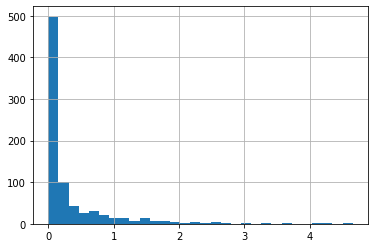

In [13]:
dfn_train['FL_WMH_VOL_icv'].hist(bins=30)

<AxesSubplot:>

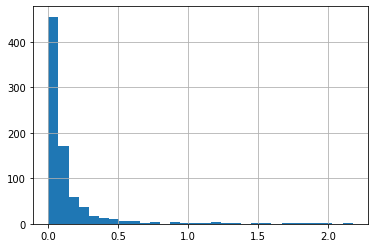

In [14]:
dfn_train['Cerebral WM Hypointensities* Total Percent Of Icv'].hist(bins=30)

---

### Test ICV

In [15]:
use_cols = ["Cerebral WM Hypointensities* Total Volume",
            "Cerebral WM Hypointensities* Total Percent Of Icv",
            "Cortical Gray Matter Total Percent Of Icv",
            "Ventricle Total Percent Of Icv",
            "Cerebral White Matter Total Percent Of Icv",
            "Whole Brain Total Percent Of Icv",
            "Intracranial Volume Total Volume"]

In [16]:
# test get "Intracranial Volume Total Volume"
dfn_test = pd.read_excel(pathn_test, index_col=0)[use_cols]

In [17]:
dfn_test

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume
FOLDERNAME,,,,,,,
test_001,1.733,0.1045,27.4669,4.2435,31.0598,73.0549,1657.997
test_002,0.326,0.0250,29.3972,2.0766,31.9835,75.2506,1301.509
test_003,0.979,0.0668,30.0772,2.9590,30.0145,73.4716,1464.910
test_004,8.414,0.5029,24.5333,6.4309,27.5203,64.2414,1673.105
test_005,1.270,0.0737,30.5924,2.3254,33.0688,77.8039,1722.763
...,...,...,...,...,...,...,...
test_167,1.555,0.0947,34.3623,2.7219,30.7004,79.7159,1642.426
test_168,0.123,0.0085,29.4961,3.2111,33.4951,78.0485,1451.734
test_169,0.341,0.0238,33.0468,1.6259,32.8078,79.7647,1434.458


### Test Grade

In [18]:
# assign grade & FLAIR volume data(mm3)
df_test = pd.read_excel(path_test, index_col=0)[grade_cols]

grade_data = dict()
for col in grade_cols:
    grade_data[col] = []
    
for index in dfn_test.index:
    for col in grade_cols:
        grade_data[col].append(df_test.loc[index, col])

for col in grade_cols:
    dfn_test[col] = grade_data[col]

In [19]:
dfn_test

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume,WMH_GRADE,FL_WMH_VOL_mm3,FL_PVWMH_VOL_mm3,FL_DWMH_VOL_mm3
FOLDERNAME,,,,,,,,,,,
test_001,1.733,0.1045,27.4669,4.2435,31.0598,73.0549,1657.997,1,12296.854492,8853.735352,3443.119385
test_002,0.326,0.0250,29.3972,2.0766,31.9835,75.2506,1301.509,1,5832.676758,2353.011475,3479.665283
test_003,0.979,0.0668,30.0772,2.9590,30.0145,73.4716,1464.910,1,6695.860352,5216.877441,1478.983032
test_004,8.414,0.5029,24.5333,6.4309,27.5203,64.2414,1673.105,2,18199.800781,17727.855469,471.945190
test_005,1.270,0.0737,30.5924,2.3254,33.0688,77.8039,1722.763,2,8290.060547,7381.621094,908.439087
...,...,...,...,...,...,...,...,...,...,...,...
test_167,1.555,0.0947,34.3623,2.7219,30.7004,79.7159,1642.426,1,1783.655396,1770.361084,13.294326
test_168,0.123,0.0085,29.4961,3.2111,33.4951,78.0485,1451.734,0,510.719971,464.190186,46.529804
test_169,0.341,0.0238,33.0468,1.6259,32.8078,79.7647,1434.458,1,5451.742188,4030.367432,1421.374634


### Test volume to icv

In [20]:
# calculate mL(cm3)
dfn_test["FL_WMH_VOL_mL"] = dfn_test["FL_WMH_VOL_mm3"]*0.001
dfn_test["FL_PVWMH_VOL_mL"] = dfn_test["FL_PVWMH_VOL_mm3"]*0.001
dfn_test["FL_DWMH_VOL_mL"] = dfn_test["FL_DWMH_VOL_mm3"]*0.001

In [21]:
# calculate ICV (ICV:cm3!!!!)
dfn_test["FL_WMH_VOL_icv"] = dfn_test["FL_WMH_VOL_mL"]*100 / dfn_test[icv_col]
dfn_test["FL_PVWMH_VOL_icv"] = dfn_test["FL_PVWMH_VOL_mL"]*100 / dfn_test[icv_col]
dfn_test["FL_DWMH_VOL_icv"] = dfn_test["FL_DWMH_VOL_mL"]*100 / dfn_test[icv_col]

In [22]:
dfn_test

,Cerebral WM Hypointensities* Total Volume,Cerebral WM Hypointensities* Total Percent Of Icv,Cortical Gray Matter Total Percent Of Icv,Ventricle Total Percent Of Icv,Cerebral White Matter Total Percent Of Icv,Whole Brain Total Percent Of Icv,Intracranial Volume Total Volume,WMH_GRADE,FL_WMH_VOL_mm3,FL_PVWMH_VOL_mm3,FL_DWMH_VOL_mm3,FL_WMH_VOL_mL,FL_PVWMH_VOL_mL,FL_DWMH_VOL_mL,FL_WMH_VOL_icv,FL_PVWMH_VOL_icv,FL_DWMH_VOL_icv
FOLDERNAME,,,,,,,,,,,,,,,,,
test_001,1.733,0.1045,27.4669,4.2435,31.0598,73.0549,1657.997,1,12296.854492,8853.735352,3443.119385,12.296854,8.853735,3.443119,0.741669,0.534002,0.207667
test_002,0.326,0.0250,29.3972,2.0766,31.9835,75.2506,1301.509,1,5832.676758,2353.011475,3479.665283,5.832677,2.353011,3.479665,0.448147,0.180791,0.267356
test_003,0.979,0.0668,30.0772,2.9590,30.0145,73.4716,1464.910,1,6695.860352,5216.877441,1478.983032,6.695860,5.216877,1.478983,0.457083,0.356123,0.100961
test_004,8.414,0.5029,24.5333,6.4309,27.5203,64.2414,1673.105,2,18199.800781,17727.855469,471.945190,18.199801,17.727855,0.471945,1.087786,1.059578,0.028208
test_005,1.270,0.0737,30.5924,2.3254,33.0688,77.8039,1722.763,2,8290.060547,7381.621094,908.439087,8.290061,7.381621,0.908439,0.481207,0.428476,0.052732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test_167,1.555,0.0947,34.3623,2.7219,30.7004,79.7159,1642.426,1,1783.655396,1770.361084,13.294326,1.783655,1.770361,0.013294,0.108599,0.107789,0.000809
test_168,0.123,0.0085,29.4961,3.2111,33.4951,78.0485,1451.734,0,510.719971,464.190186,46.529804,0.510720,0.464190,0.046530,0.035180,0.031975,0.003205
test_169,0.341,0.0238,33.0468,1.6259,32.8078,79.7647,1434.458,1,5451.742188,4030.367432,1421.374634,5.451742,4.030367,1.421375,0.380056,0.280968,0.099088


<AxesSubplot:>

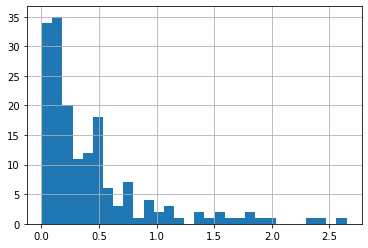

In [23]:
dfn_test['FL_WMH_VOL_icv'].hist(bins=30)

<AxesSubplot:>

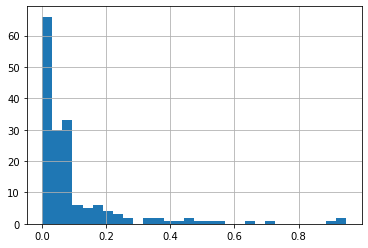

In [24]:
dfn_test['Cerebral WM Hypointensities* Total Percent Of Icv'].hist(bins=30)

---

### Save as csv

In [25]:
# train data
dfn_train.to_csv("labels/traindata_final.csv")

# test data
dfn_test.to_csv("labels/testdata_final.csv")

<AxesSubplot:>

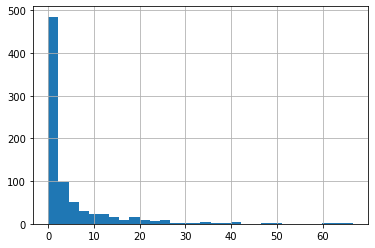

In [26]:
dfn_train['FL_WMH_VOL_mL'].hist(bins=30)

<AxesSubplot:>

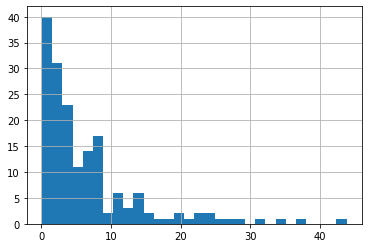

In [27]:
dfn_test['FL_WMH_VOL_mL'].hist(bins=30)